In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#pour stocker le model
import pickle

In [3]:
df = pd.read_csv('/content/sample_data/train.csv')

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

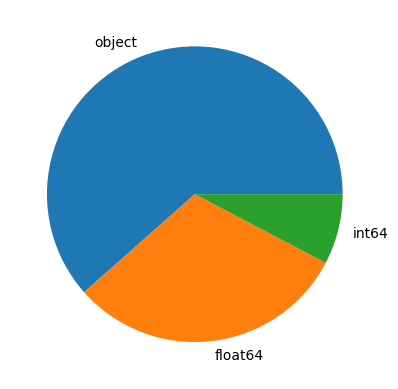

In [7]:
df.dtypes.value_counts().plot.pie()

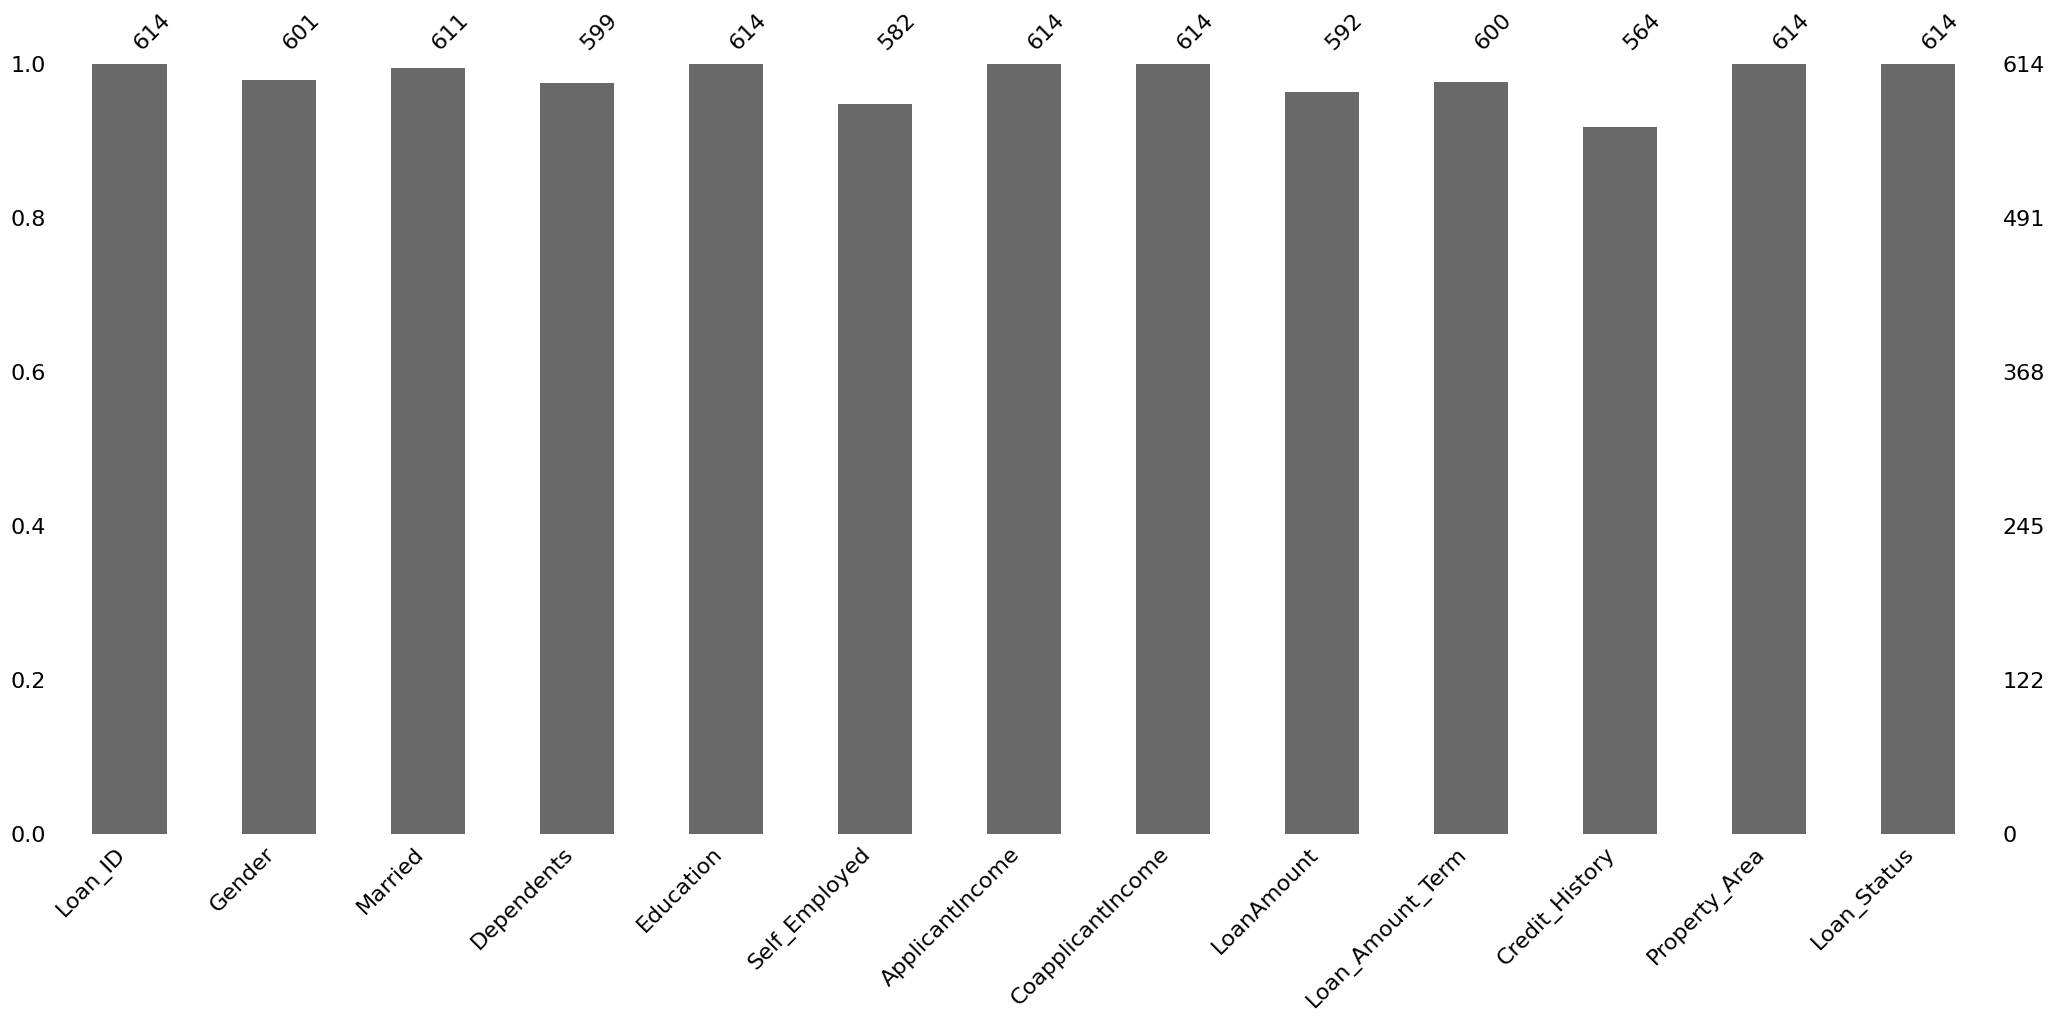

In [8]:
msno.bar(df)
plt.show()

In [9]:
missing_value= df.isnull().sum()
missing_per = (missing_value/len(df))*100
missing_table = pd.DataFrame({'Missing value': missing_value, 'Percentage': missing_per})
print(missing_table)

                   Missing value  Percentage
Loan_ID                        0    0.000000
Gender                        13    2.117264
Married                        3    0.488599
Dependents                    15    2.442997
Education                      0    0.000000
Self_Employed                 32    5.211726
ApplicantIncome                0    0.000000
CoapplicantIncome              0    0.000000
LoanAmount                    22    3.583062
Loan_Amount_Term              14    2.280130
Credit_History                50    8.143322
Property_Area                  0    0.000000
Loan_Status                    0    0.000000


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
var_cat = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
print ('le variables categorielles sont',var_cat)
print ('le variables numeriques sont',var_num)

le variables categorielles sont ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
le variables numeriques sont ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [37]:
#Les valuers manquantes categorielles sont remplacées par le mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [38]:
#Les valuers manquantes numeriques sont remplacées par mediane
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [39]:
missing_value= df.isnull().sum()
missing_per = (missing_value/len(df))*100
missing_table = pd.DataFrame({'Missing value': missing_value, 'Percentage': missing_per})
print(missing_table)

                   Missing value  Percentage
Loan_ID                        0         0.0
Gender                         0         0.0
Married                        0         0.0
Dependents                     0         0.0
Education                      0         0.0
Self_Employed                  0         0.0
ApplicantIncome                0         0.0
CoapplicantIncome              0         0.0
LoanAmount                     0         0.0
Loan_Amount_Term               0         0.0
Credit_History                 0         0.0
Property_Area                  0         0.0
Loan_Status                    0         0.0


##Analyse univariée



In [40]:
credit = df['Loan_Status'].value_counts()
credit_per = (credit/credit.sum())*100
credit_res =  pd.DataFrame({'Credit': credit, '%credit': credit_per})
print(credit_res)

   Credit    %credit
Y     422  68.729642
N     192  31.270358


In [41]:
#variables categoriques
#df['Gender'].unique()
genre=df['Gender'].value_counts(normalize=True)*100
dep=df['Dependents'].value_counts(normalize=True)*100
self_emp=df['Self_Employed'].value_counts(normalize=True)*100
his=df['Credit_History'].value_counts(normalize=True)*100
print('=============genre==========')
print(genre)
print('=============Nbre enfants==========')
print(dep)
print('=============Self_Employed==========')
print(self_emp)
print('=============Credit_History==========')
print(his)

=============genre==========
Male      81.758958
Female    18.241042
Name: Gender, dtype: float64
=============Nbre enfants==========
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64
=============Self_Employed==========
No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64
=============Credit_History==========
1.0    85.504886
0.0    14.495114
Name: Credit_History, dtype: float64


In [42]:
#variables numeriques
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


##Analyse bivariée

TypeError: tuple indices must be integers or slices, not tuple

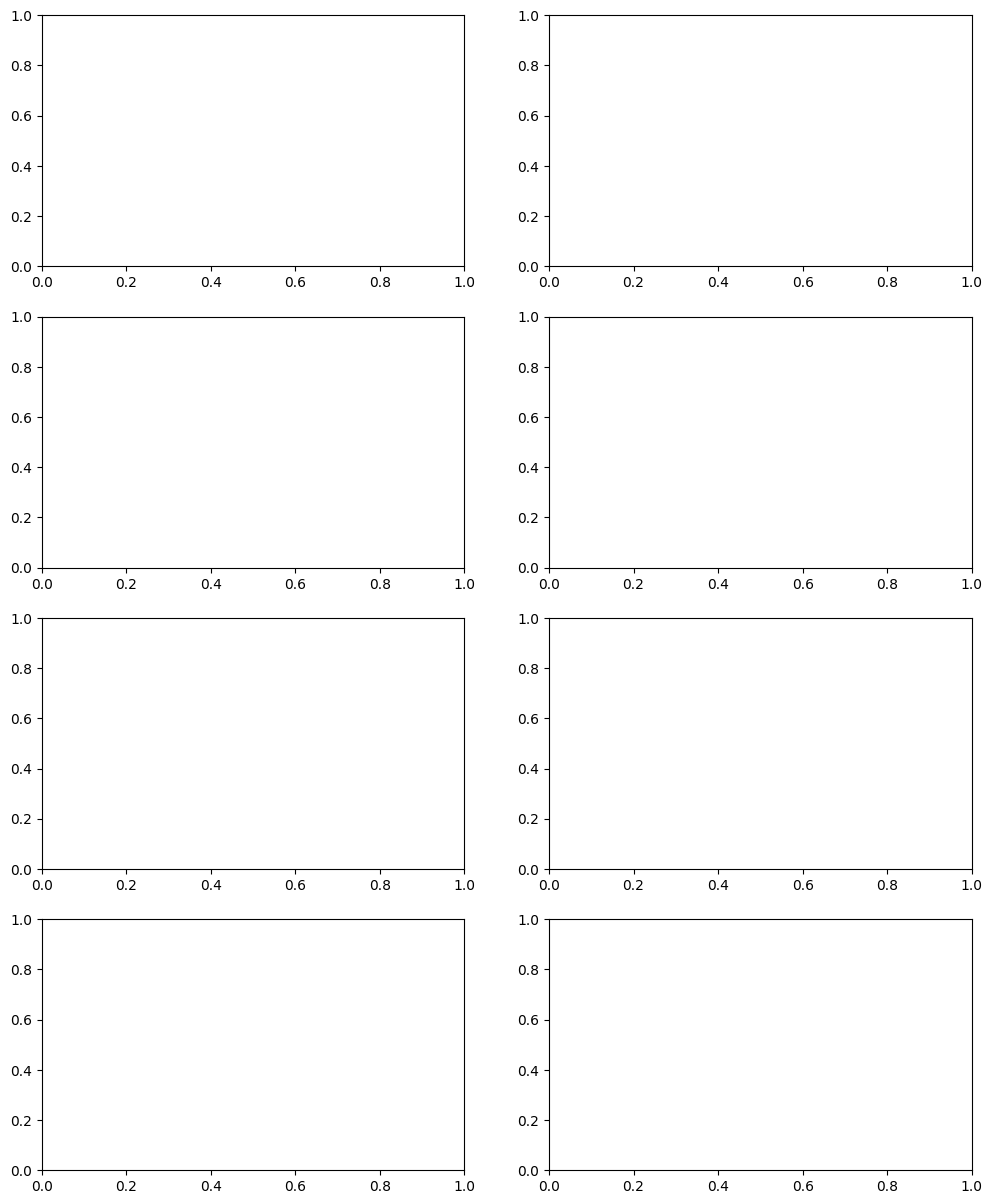

In [18]:
#les variables categorielles
fig=axes =plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<ipython-input-43-2f48bc40092a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


<Axes: >

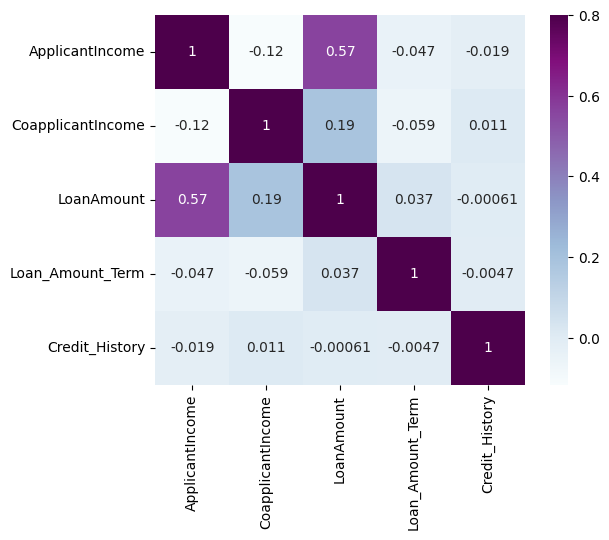

In [43]:
#matrice de correlation ou la headmap pour les valeurs numeriques
matrix = df.corr()
# f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

In [44]:
df[var_cat]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [45]:
df[var_num]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


Création du modèle

In [46]:
df_cat= df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [47]:
#remplacer par 0 et 1 avec scikit-learn
df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [48]:
df_num = df[var_num]

In [49]:
#concatener df_cat avec df_num
df_encoded=pd.concat([df_cat,df_num],axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [50]:
y=df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [52]:
X=df_encoded.drop('Loan_Status_Y',axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [57]:
#Spécifier la partie test et la partie train
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [58]:
#instancier le model
clf=LogisticRegression()
#entrainer le modèle
clf.fit(x_train,y_train)

LogisticRegression()

In [59]:
#tester les modèles
pred=clf.predict(x_test)

In [63]:
#valeur prédite
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [64]:
#valeur du dataset
y_test

387    0
266    1
292    1
392    1
332    1
      ..
309    1
511    1
98     1
238    1
462    1
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [66]:
accuracy_score(y_test,pred)

0.8373983739837398

In [70]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [72]:
#faire une prévision
profil_test = [[0,1,1,0,0,0,1,0,1,0,100,0,400,360]]
clf.predict(profil_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [74]:
#enregistrer le modelèle pour l'utiliser dans le webapplication
pickle.dump(clf,open('prevision_credit.pkl','wb'))